In [541]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Leemos el archivo

In [542]:
datos=pd.read_csv('house_train_raw.csv')

In [543]:
datos.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Hacemos un grafico para comprender y visualizar la distribucion de Sale price

c:\Users\mariano\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

c:\Users\mariano\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

c:\Users\mariano\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

c:\Users\mariano\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and 

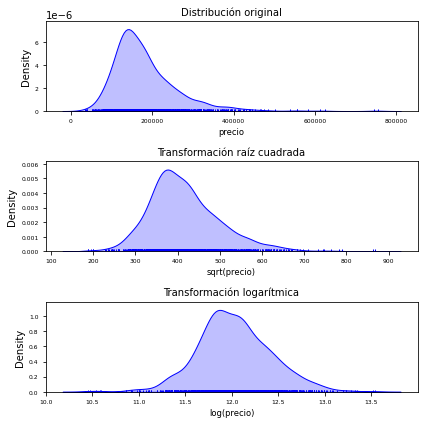

In [544]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    datos.SalePrice,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(datos.SalePrice),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(datos.SalePrice),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

Gragicoo para ver la distribucion de cada variable numerica

IndexError: list index out of range

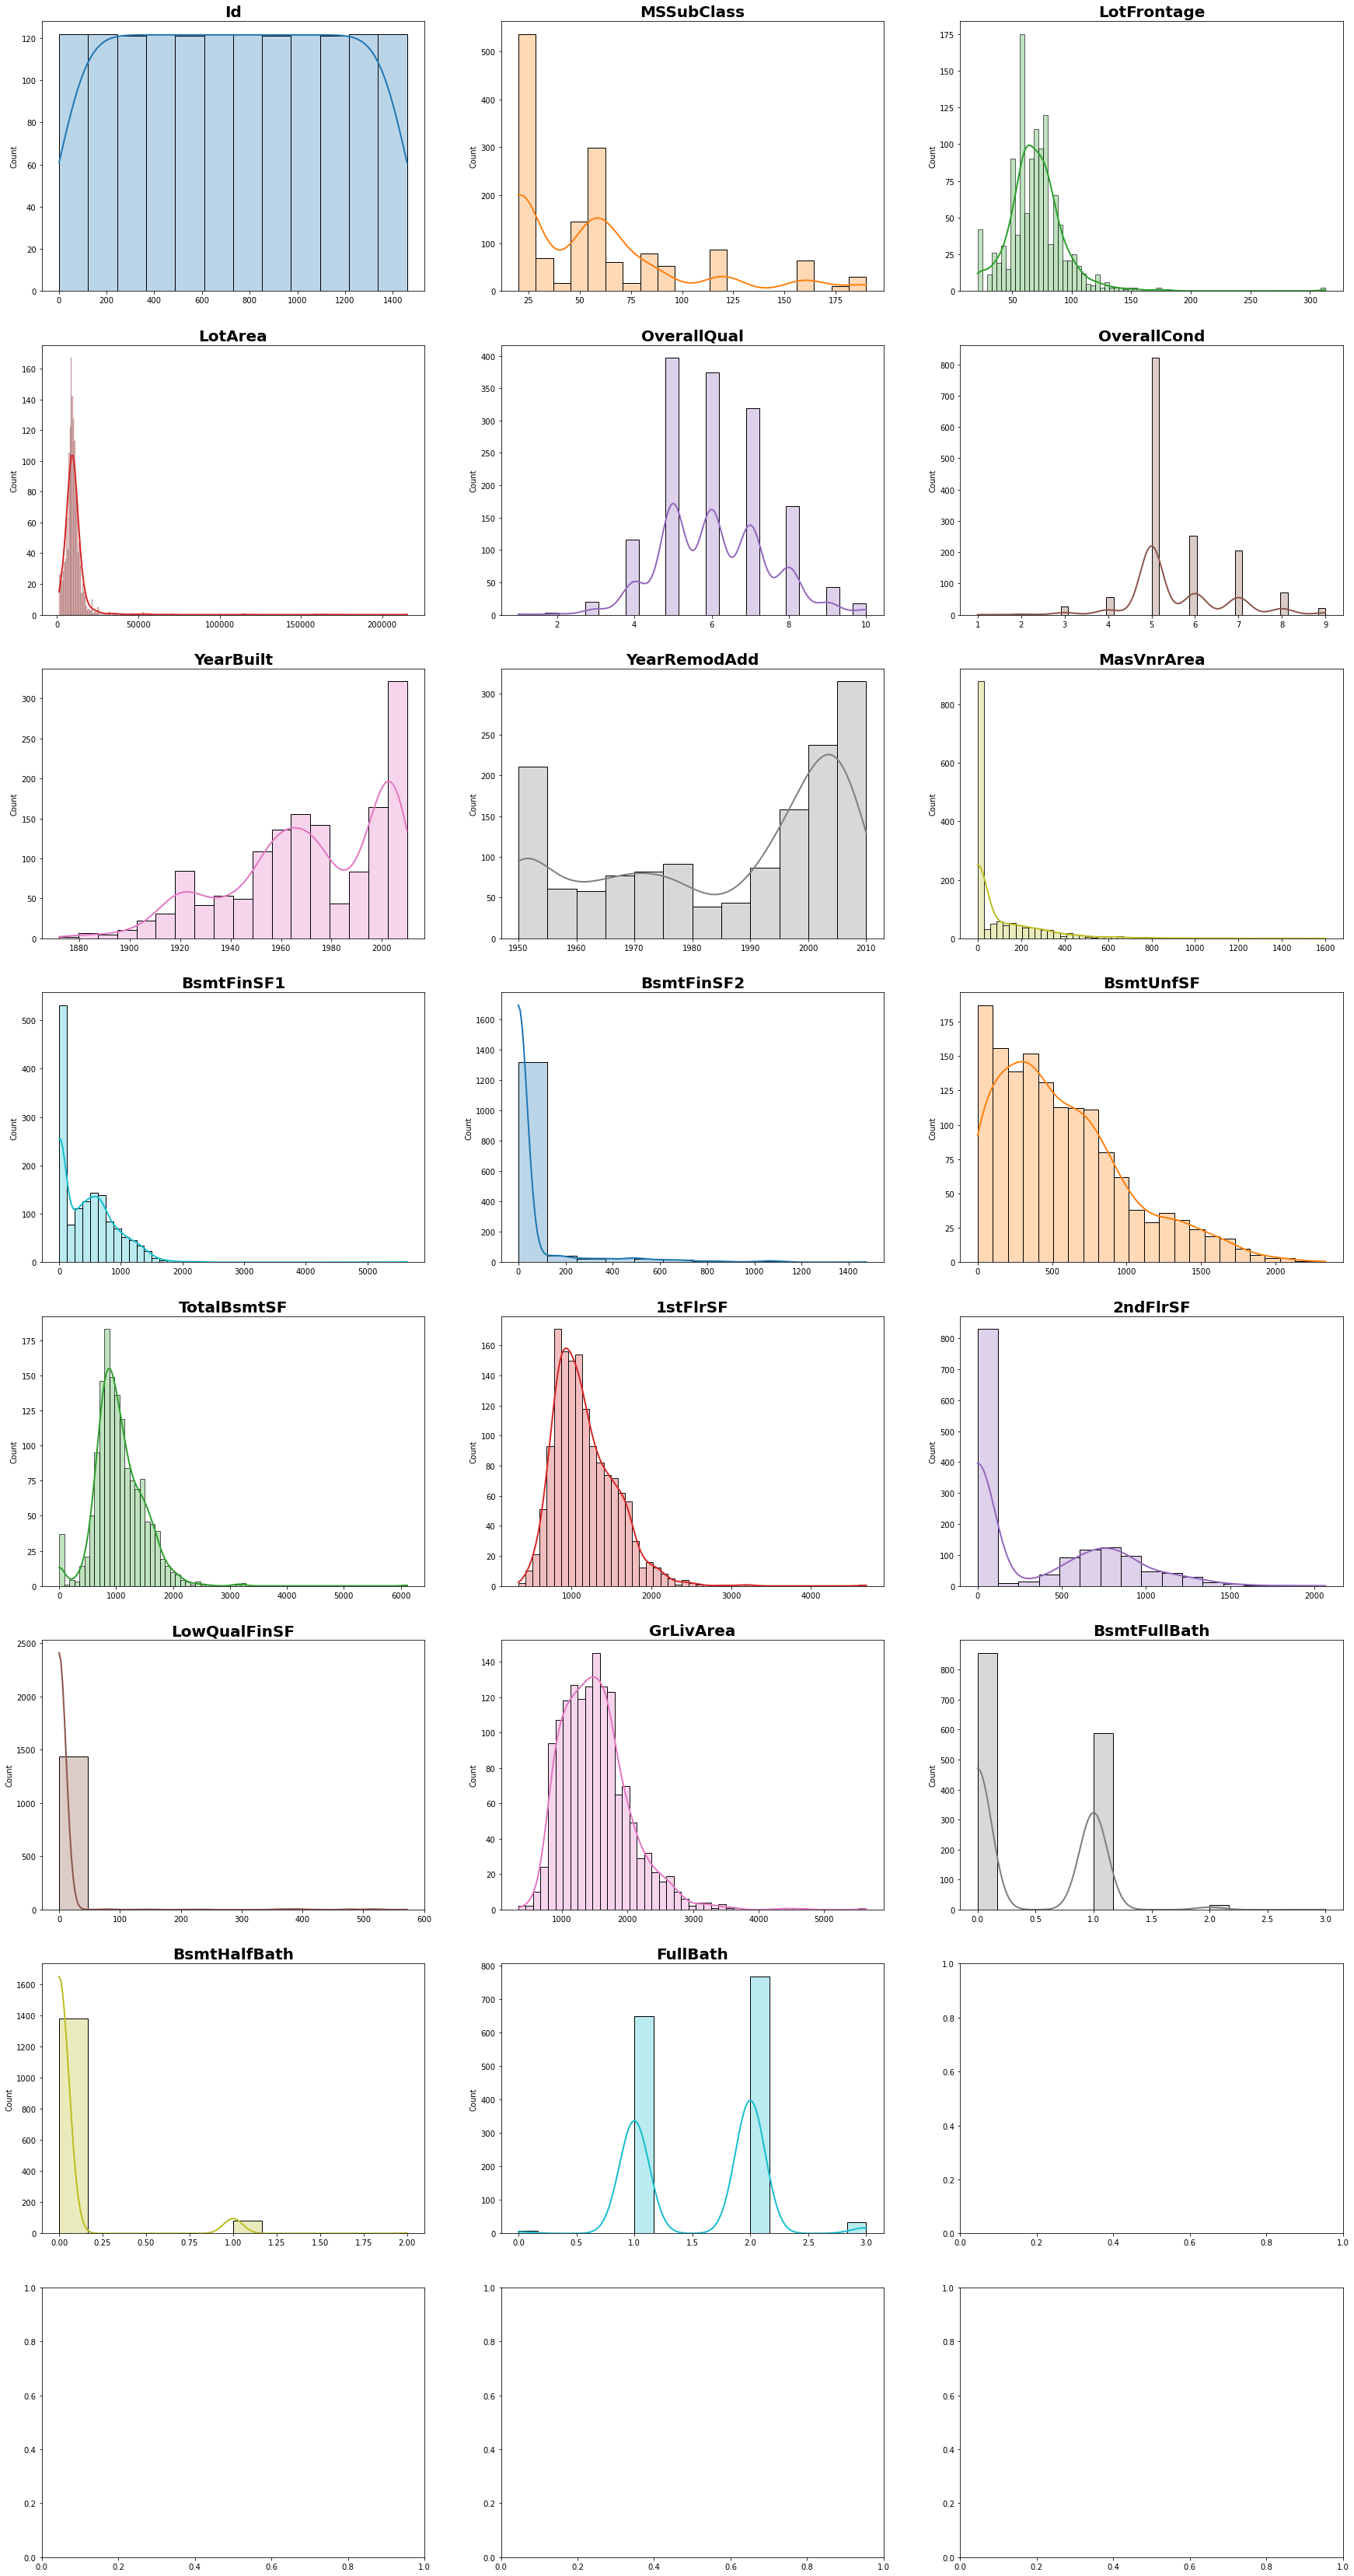

In [545]:

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(30,60))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('SalePrice')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

Hacemos un regplot para cada variable numerica 

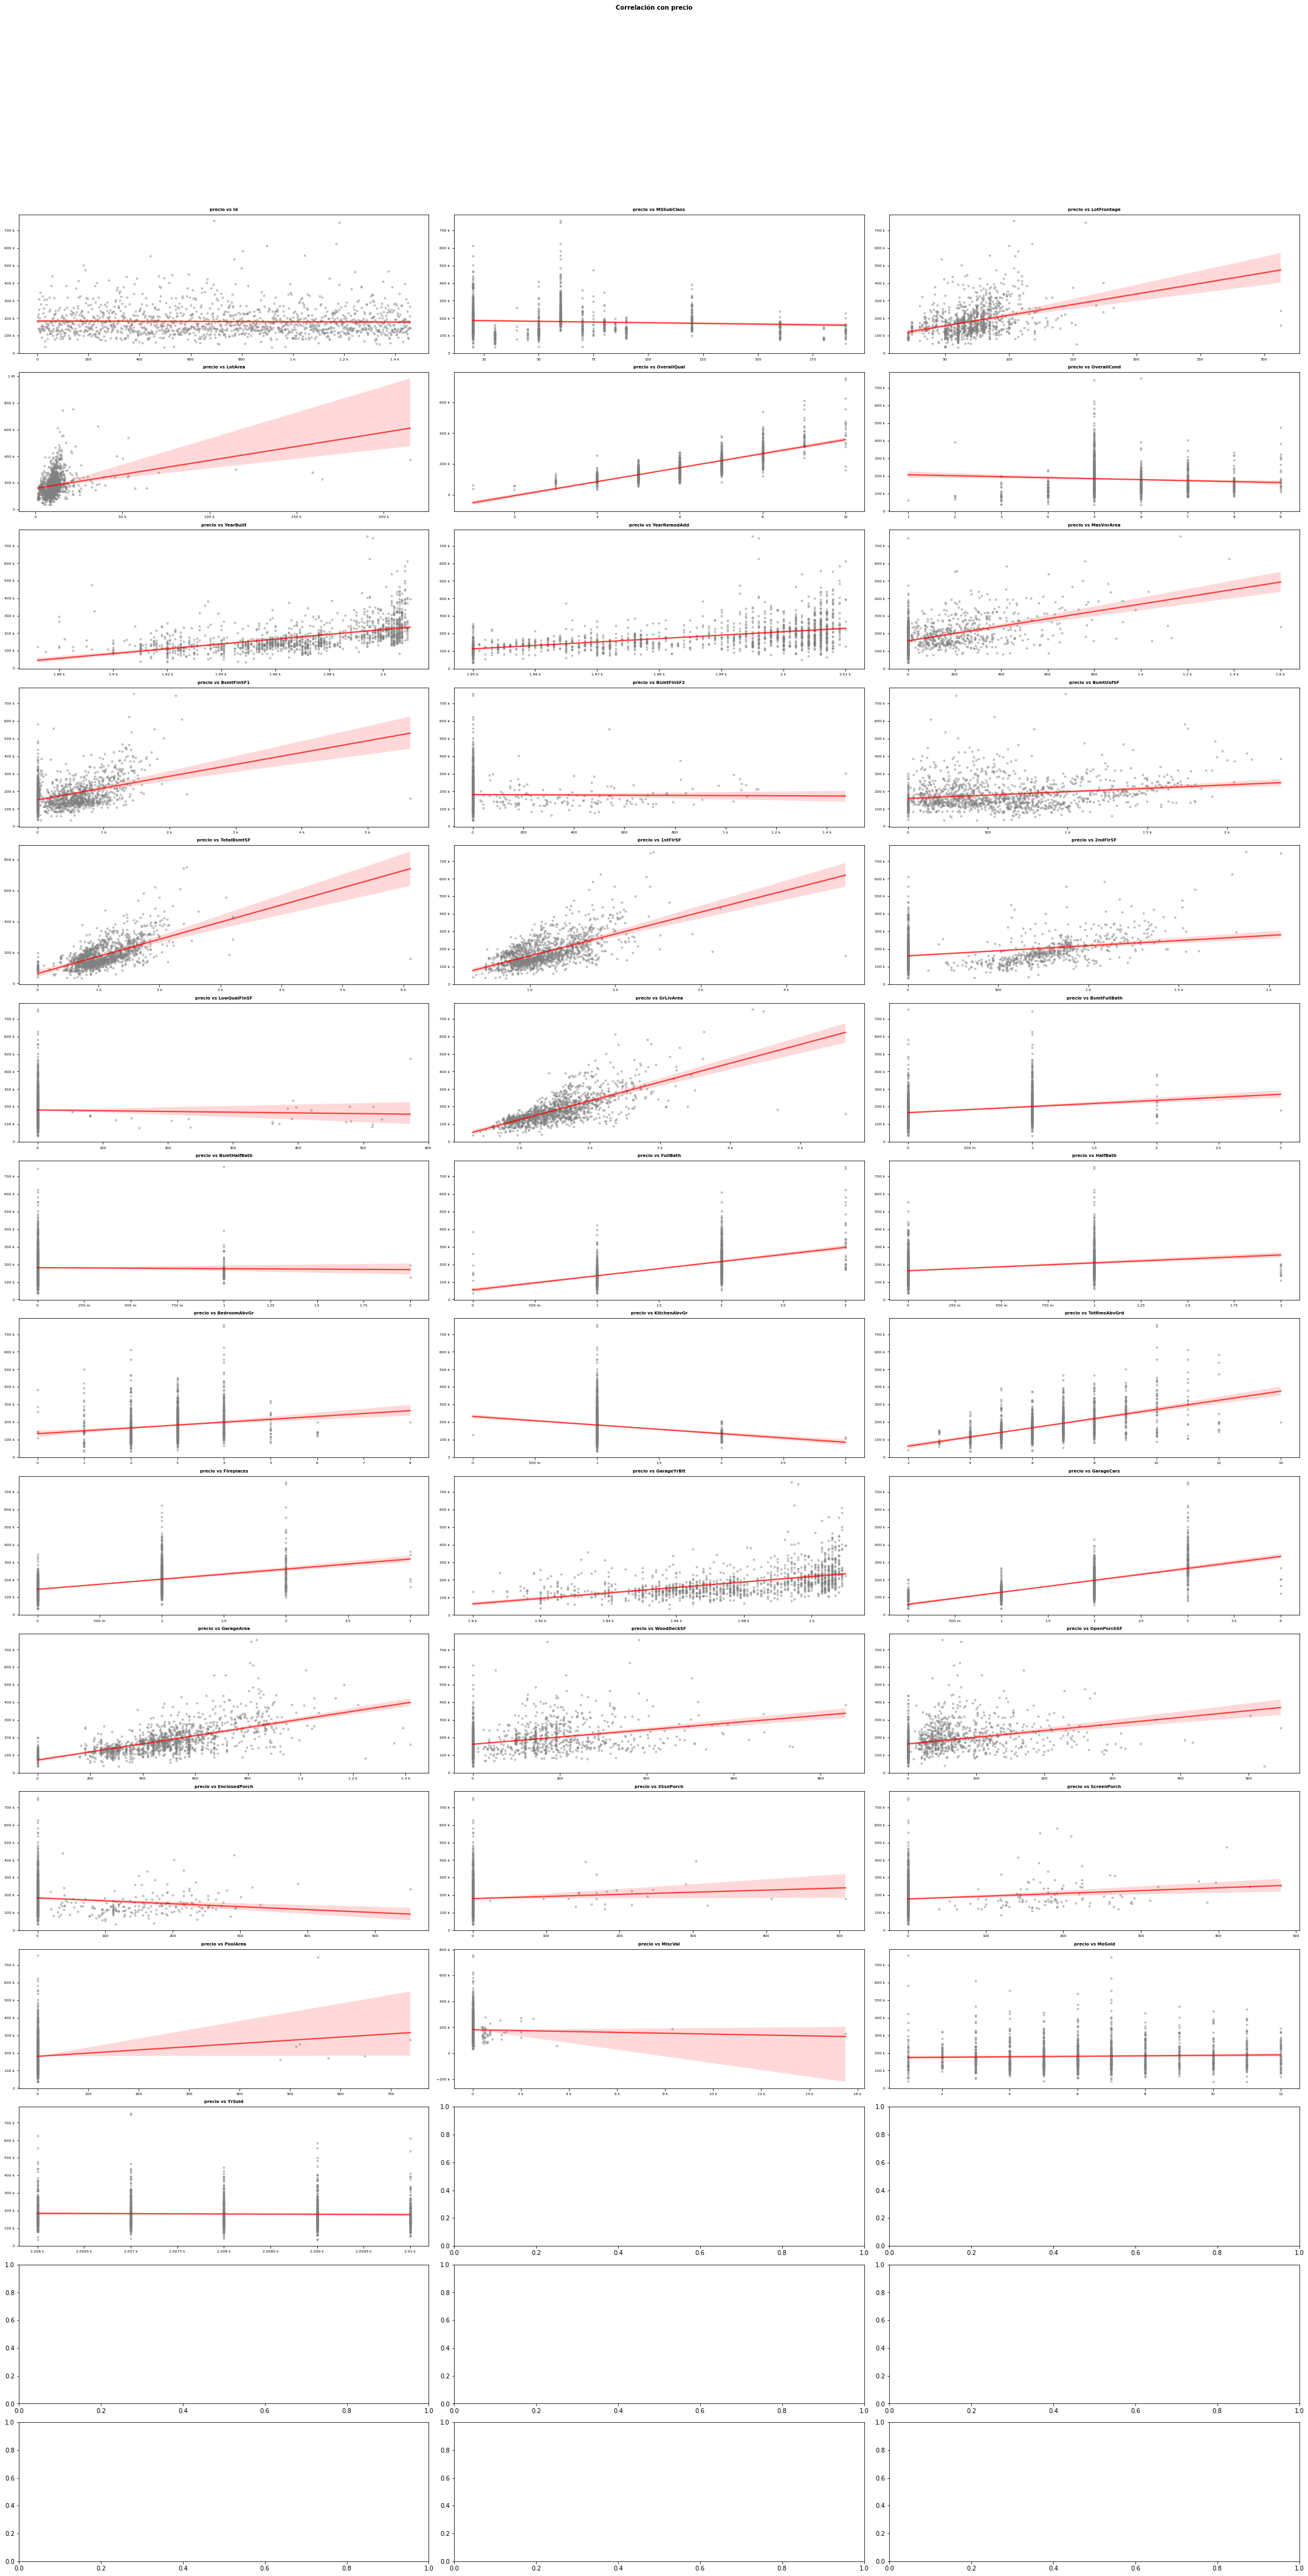

In [546]:

fig, axes = plt.subplots(nrows=15, ncols=3, figsize=(30,60))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('SalePrice')


for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = datos[colum],
        y           = datos['SalePrice'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold");

Correlacion entre los datos numericos y SalePrice

In [547]:
datos.corr()['SalePrice'].sort_values(ascending=False).head(10)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

Comprendemos la distribucion da las variables cualitativas

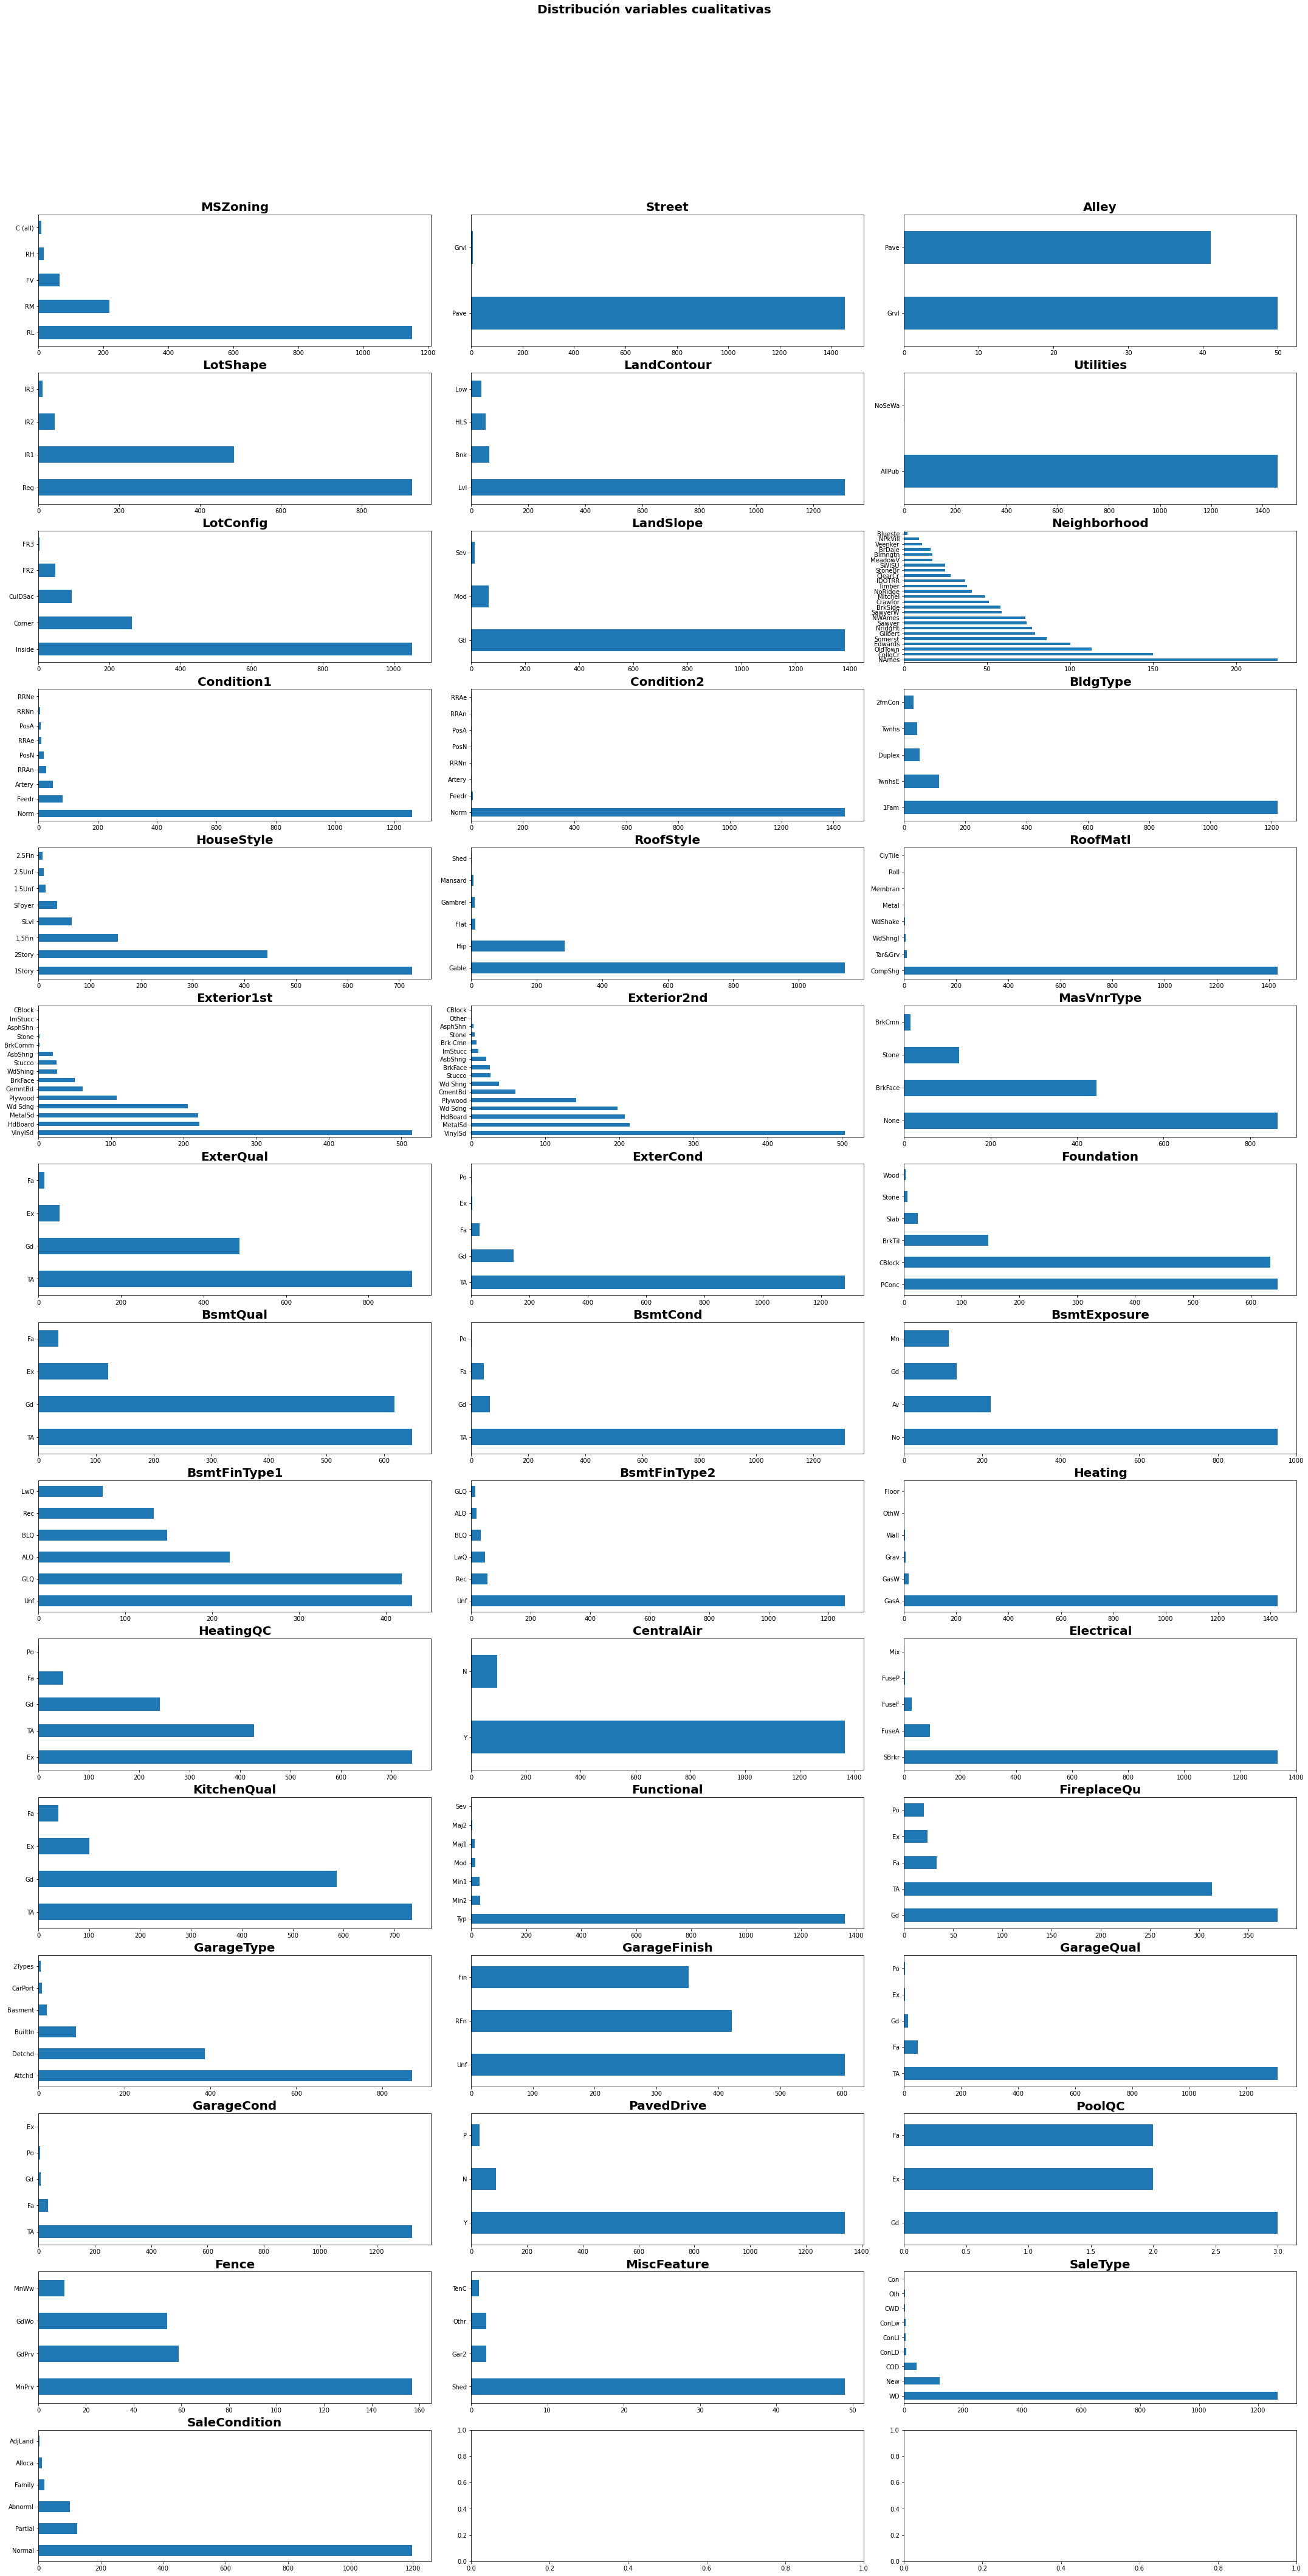

In [548]:

fig, axes = plt.subplots(nrows=15, ncols=3, figsize=(30, 60))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    datos[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
#for i in [7, 8]:
#    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 20, fontweight = "bold");

Una vez eleguidos unas variables. Las procesamos

In [549]:
datos=pd.read_csv('house_train_raw.csv')

Nos quedamos con las columnas que queremos

In [550]:
datos1=datos[["OverallQual","YearBuilt","GarageArea","GrLivArea","TotalBsmtSF","1stFlrSF"]]

In [551]:
datos1

,OverallQual,YearBuilt,GarageArea,GrLivArea,TotalBsmtSF,1stFlrSF
0,7,2003,548,1710,856,856
1,6,1976,460,1262,1262,1262
2,7,2001,608,1786,920,920
3,7,1915,642,1717,756,961
4,8,2000,836,2198,1145,1145
...,...,...,...,...,...,...
1455,6,1999,460,1647,953,953
1456,6,1978,500,2073,1542,2073
1457,7,1941,252,2340,1152,1188
1458,5,1950,240,1078,1078,1078


Visualizamos outliers

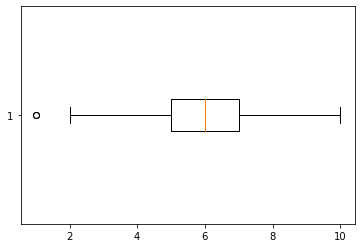

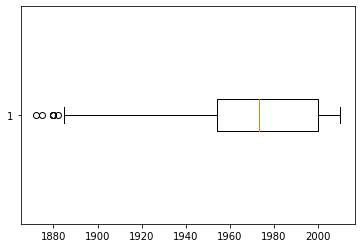

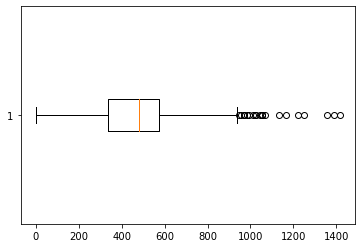

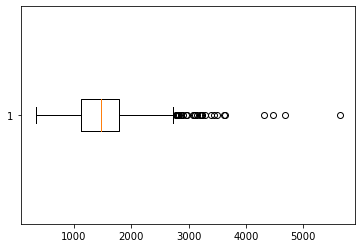

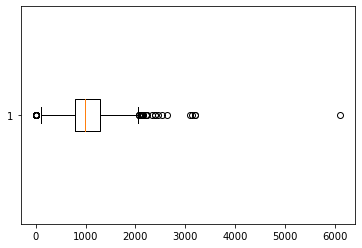

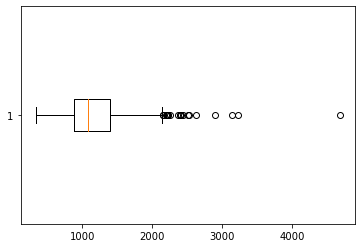

2800

In [552]:
plt.boxplot (datos1["OverallQual"],vert=False)
plt.show()
plt.boxplot (datos1["YearBuilt"],vert=False)
plt.show()
plt.boxplot (datos1["GarageArea"],vert=False)
plt.show()
1150
plt.boxplot (datos1["GrLivArea"],vert=False)
plt.show()
4000
plt.boxplot (datos1["TotalBsmtSF"],vert=False)
plt.show()
2800
plt.boxplot (datos1["1stFlrSF"],vert=False)
plt.show()
2800

Sacamos algunos outliers

In [553]:
#eliminamos los outliers
#datos1=datos1[datos1["OverallQual"]<=10]
#datos1=datos1[datos1["YearBuilt"]<=1980]
datos1=datos1[datos1["GarageArea"]<=1150]
datos1=datos1[datos1["GrLivArea"]<=4000]
datos1=datos1[datos1["TotalBsmtSF"]<=2800]
datos1=datos1[datos1["1stFlrSF"]<=2800]


In [554]:
#GarageFinish/GarageType(hacerlo 3 varianble)/kitchenqual(hacerlo 3 variable)/BsmtFinType1/BsmtQual/
datos2=datos[["GarageFinish","GarageType","KitchenQual","BsmtFinType1","BsmtQual","SalePrice"]]
datos=pd.concat([datos1,datos2],axis=1)
datos.isnull().sum().head(50)

OverallQual     13
YearBuilt       13
GarageArea      13
GrLivArea       13
TotalBsmtSF     13
1stFlrSF        13
GarageFinish    81
GarageType      81
KitchenQual      0
BsmtFinType1    37
BsmtQual        37
SalePrice        0
dtype: int64

In [555]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1298
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1447 non-null   float64
 1   YearBuilt     1447 non-null   float64
 2   GarageArea    1447 non-null   float64
 3   GrLivArea     1447 non-null   float64
 4   TotalBsmtSF   1447 non-null   float64
 5   1stFlrSF      1447 non-null   float64
 6   GarageFinish  1379 non-null   object 
 7   GarageType    1379 non-null   object 
 8   KitchenQual   1460 non-null   object 
 9   BsmtFinType1  1423 non-null   object 
 10  BsmtQual      1423 non-null   object 
 11  SalePrice     1460 non-null   int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 148.3+ KB


Rellenamos los nulos con No en las categoricas y con la media en las demas



In [556]:
#Rellenamos los nulos con la media en las demas
datos["OverallQual"].fillna(datos["YearBuilt"].mean(),inplace=True)
datos["YearBuilt"].fillna(datos["YearBuilt"].mean(),inplace=True)
datos["GarageArea"].fillna(datos["GarageArea"].mean(),inplace=True)
datos["GrLivArea"].fillna(datos["GrLivArea"].mean(),inplace=True)
datos["TotalBsmtSF"].fillna(datos["TotalBsmtSF"].mean(),inplace=True)
datos["1stFlrSF"].fillna(datos["1stFlrSF"].mean(),inplace=True)


In [557]:
#Rellenamos los nulos con No en las categoricas  en las demas
datos["GarageFinish"].fillna("No",inplace=True)
datos["GarageType"].fillna("No",inplace=True)
datos["KitchenQual"].fillna("TA",inplace=True)
datos["BsmtFinType1"].fillna("No",inplace=True)
datos["BsmtQual"].fillna("TA",inplace=True)


VERIFICACION DE los nulos

In [558]:
datos.isnull().sum().head(50)

OverallQual     0
YearBuilt       0
GarageArea      0
GrLivArea       0
TotalBsmtSF     0
1stFlrSF        0
GarageFinish    0
GarageType      0
KitchenQual     0
BsmtFinType1    0
BsmtQual        0
SalePrice       0
dtype: int64

Creamos Tablas para las variables categoricas

In [559]:

datos=pd.get_dummies(datos,columns=  ['BsmtQual'])
datos=pd.get_dummies(datos,columns=  ['BsmtFinType1'])
datos=pd.get_dummies(datos,columns=  ['KitchenQual'])
datos=pd.get_dummies(datos,columns=  ['GarageType'])
datos=pd.get_dummies(datos,columns=  ['GarageFinish'])


Generamos el train test split

In [560]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop('SalePrice', axis = 'columns'),
                                        datos['SalePrice'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True)



Primero hacemos prediccion con el modelo de arbol de decision

Arbol

In [ ]:
from sklearn.tree import DecisionTreeRegressor
max_depth = 7
rgr_tree = DecisionTreeRegressor(criterion='mse', max_depth = max_depth, random_state = 42)
rgr_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
y_train_pred_tree = rgr_tree.predict(X_train)
y_test_pred_tree = rgr_tree.predict(X_test)

In [ ]:
# Se crea un dataframe con las predicciones y el valor real
df_predicciones = pd.DataFrame({'precio' : y_test, 'prediccion' : y_test_pred_tree})
df_predicciones

,precio,prediccion
611,148000,147680.265306
648,155000,167289.473684
1001,86000,102528.421053
743,175000,116764.400000
1251,171750,193043.703704
...,...,...
92,163500,102528.421053
353,105900,120178.571429
782,187100,193043.703704
816,137000,127337.252101


In [ ]:
# neg_root_mean_squared_error de test
# ==============================================================================
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(
        y_true = y_test,
        y_pred = y_test_pred_tree,
        squared = False
       )
rmse

36900.82950509892

In [ ]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( y_test,y_test_pred_tree))

0.17400091064507506

Creamos el modelo de kNeighborsregressor

KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
n_neighbors = 9
rgr_knn = KNeighborsRegressor(n_neighbors = n_neighbors)
rgr_knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [ ]:
y_train_pred_knn = rgr_knn.predict(X_train)
y_test_pred_knn = rgr_knn.predict(X_test)


Error en datos de train: 1370247478.6545396
Error en datos de test: 1941261740.4062603


Sacamos el RMSLE

In [ ]:
from sklearn.metrics import mean_squared_log_error
#evaluación del modelo
np.sqrt(mean_squared_log_error(y_test,y_test_pred_knn  ))

0.2226361130740757

Creamos un modelo de regresion lineal

linear regresion

In [561]:
from sklearn.linear_model import LinearRegression


Generamos el train test split

In [562]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop('SalePrice', axis = 'columns'),
                                        datos['SalePrice'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True)

Creamos un modelo de regresion lineal

In [563]:
modelo = LinearRegression(fit_intercept=True)

Lo entrenamos

In [564]:
modelo.fit(X_train, y_train)

LinearRegression()

Hacemos la prediccion

In [565]:
y_test_pred=modelo.predict(X_test)

Visualiza las predicciones

In [566]:
df_predicciones = pd.DataFrame({'precio' : y_test, 'prediccion' : y_test_pred})
df_predicciones

,precio,prediccion
611,148000,146540.818850
648,155000,158688.108651
1001,86000,123956.559450
743,175000,149584.260434
1251,171750,188683.786939
...,...,...
92,163500,118192.759986
353,105900,78589.074244
782,187100,196739.669323
816,137000,120628.948704


Sacamos el RMSLE

In [567]:
from sklearn.metrics import mean_squared_log_error
#evaluación del modelo
np.sqrt(mean_squared_log_error(y_test,y_test_pred  ))


0.16538610920660102

Insertamos los datos en el nuevo csv

In [606]:
Pred_Entre=pd.read_csv("houses_test_raw.csv")

In [607]:
Pred_Entre

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,126964.376712
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,167737.214256
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,197174.626337
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,203372.239154
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,187978.671621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,83275.040257
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,78089.038607
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,150236.663712
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,119118.486852


In [580]:
datos=Pred_Entre

In [582]:
datos1=datos[["OverallQual","YearBuilt","GarageArea","GrLivArea","TotalBsmtSF","1stFlrSF"]]
datos2=datos[["GarageFinish","GarageType","KitchenQual","BsmtFinType1","BsmtQual"]]
datos=pd.concat([datos1,datos2],axis=1)
#Rellenamos los nulos con No en las categoricas  en las demas
datos["GarageFinish"].fillna("No",inplace=True)
datos["GarageType"].fillna("No",inplace=True)
datos["KitchenQual"].fillna("TA",inplace=True)
datos["BsmtFinType1"].fillna("No",inplace=True)
datos["BsmtQual"].fillna("TA",inplace=True)
#Rellenamos los nulos con la media en las demas
datos["OverallQual"].fillna(datos["YearBuilt"].mean(),inplace=True)
datos["YearBuilt"].fillna(datos["YearBuilt"].mean(),inplace=True)
datos["GarageArea"].fillna(datos["GarageArea"].mean(),inplace=True)
datos["GrLivArea"].fillna(datos["GrLivArea"].mean(),inplace=True)
datos["TotalBsmtSF"].fillna(datos["TotalBsmtSF"].mean(),inplace=True)
datos["1stFlrSF"].fillna(datos["1stFlrSF"].mean(),inplace=True)

datos=pd.get_dummies(datos,columns=  ['BsmtQual'])
datos=pd.get_dummies(datos,columns=  ['BsmtFinType1'])
datos=pd.get_dummies(datos,columns=  ['KitchenQual'])
datos=pd.get_dummies(datos,columns=  ['GarageType'])
datos=pd.get_dummies(datos,columns=  ['GarageFinish'])


In [585]:
df_predicciones=modelo.predict(datos)
#df_predicciones = pd.DataFrame({'precio' : y_test, 'prediccion' : y_test_pred})
df_predicciones

(1459,)

In [590]:
df_predicciones=pd.DataFrame(df_predicciones)

In [589]:
df_predicciones

array([126964.37671222, 167737.21425575, 197174.62633713, ...,
       150236.66371186, 119118.48685216, 209521.57750501])

In [594]:
datos=pd.concat([Pred_Entre,df_predicciones],axis=1)

In [596]:
#renombramos columna 0
datos.rename(columns={0: 'SalePrice'}, inplace=True)
datos

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,126964.376712
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,167737.214256
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,197174.626337
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,203372.239154
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,187978.671621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,83275.040257
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,78089.038607
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,150236.663712
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,119118.486852


In [605]:
datos.to_csv("houses_test_raw.csv", index=False)